## Estudo de critérios de transição de sigmoides para modelagem matemática de múltiplas ondas epidemiológicas

Testando diferentes regras de inicialização e atualização dos parâmetros

Importando bibliotecas e módulos implementados

In [1]:
# External libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Implemented modules
import optimize
from new_wave import get_transition_points # standard filtering

Carregando dados

In [2]:
# Import data
data = pd.read_csv("../Datasets/osaka.csv") 
city_name = 'osaka' 
indicator='cases'

In [3]:
if(indicator == 'deaths'):
    #deaths
    acc_data = data.cumulative_deceased
else:
    # cases
    #acc_data = data.total_confirmed
    acc_data = data.cumulative_confirmed #(Japan)

normalized_acc_data = acc_data / max(acc_data)
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = normalized_acc_data.tolist()

if(indicator == 'deaths'):
    daily_data = data.new_deceased
else:
    daily_data = data.new_confirmed


scaling_factor = 300
acc_data = acc_data / scaling_factor
daily_data = list(daily_data/ scaling_factor)

## Testando diferentes condições iniciais para as sigmoides

In [4]:
n_weeks_pred = 2
rel_rmse_by_test = {}

### 1 - Condições iniciais padrão

x_nw: [171, 233, 307, 418, 591, 773]
Sigmoid #1 - A0:30.166107889765417 | tp0:97.02595792856762 | delta0:12.904599234015972 | nu0:1.0 
(optimal) Sigmoid #1 - A0:30.166107889765417 | tp0:97.02595792856762 | delta0:12.904599234015972 | nu0:1.0 
Sigmoid #2 - A0:61.49370665908889 | tp0:205.52508086573056 | delta0:12.472855109547268 | nu0:1.0 
(optimal) Sigmoid #2 - A0:61.49370665908889 | tp0:205.52508086573056 | delta0:12.472855109547268 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:45.206018775821754 | tp0:254.3707411027854 | delta0:6.992862879511652 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:45.206018775821754 | tp0:254.3707411027854 | delta0:6.992862879511652 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:182.60050535351664 | tp0:350.4609151350623 | delta0:11.346171181383522 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:182.60050535351664 | tp0:350.4609151350623 | delta0:11.346171181383522 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:332.47499986983223 | tp0:471.7306402837368 | delta0:10.566278978604457 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #5 - A0:332.47499986983223 | tp0:471.7306402837368 | delta0:10.566278978604457 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #6 - A0:2262.0530803193296 | tp0:653.5581599563408 | delta0:17.719356793549032 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


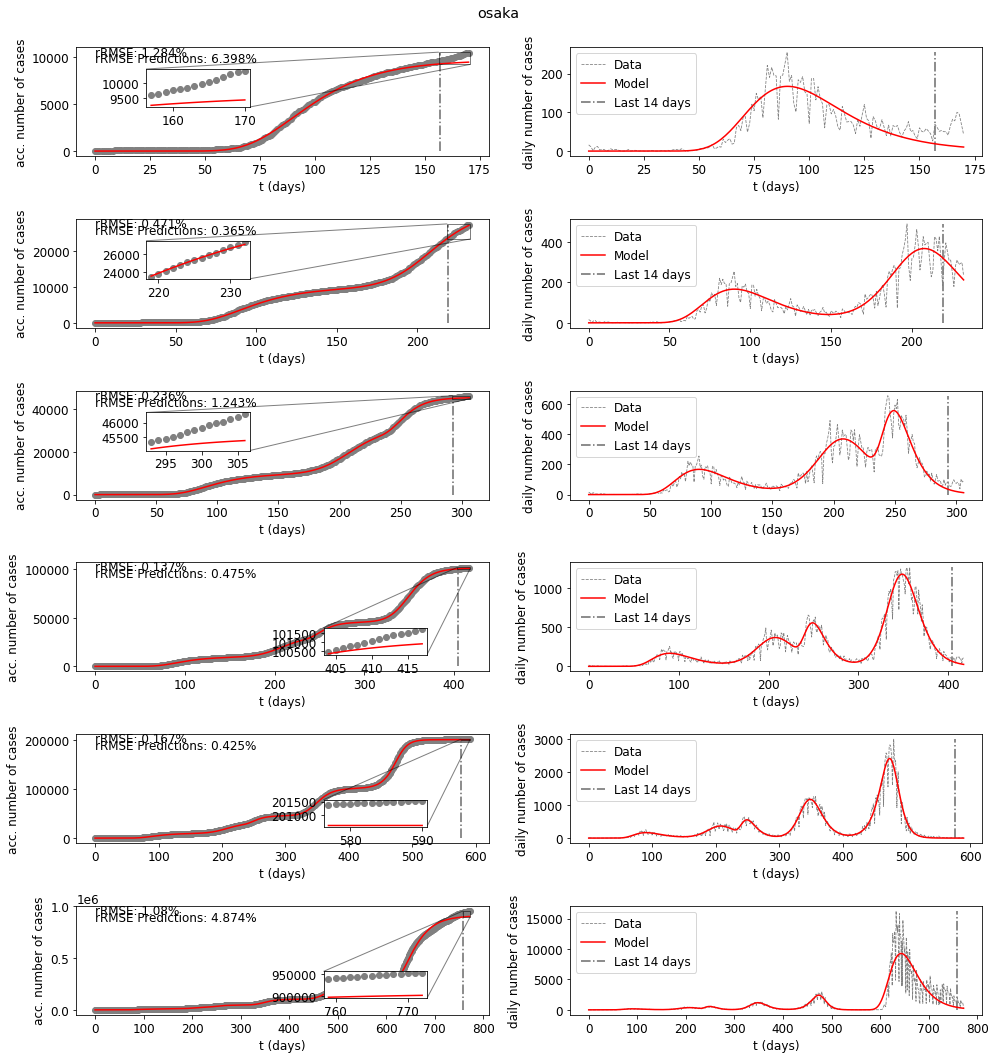

In [5]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    tp0 += 150 # Obs: ideal distance between sigmois ~ 150 days 
    A0 *= 0.005
    return [A0, tp0]

optimize.update_cond = update_cond_nw

# ====================================================================================

# Transition Points
x_nw = get_transition_points(acc_data, visual=False, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:]

print('x_nw:', x_nw)

sig_params, rel_rmse_list = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = n_weeks_pred,
                               scaling_factor = scaling_factor
                            )

rel_rmse_by_test['Test 1'] = rel_rmse_list

### 2 - A0 = 2*max(y_t) | Sem atualizar $A_0$ e $t_{p_0}$

x_nw: [171, 233, 307, 418, 591, 773]
Sigmoid #1 - A0:30.166107889765417 | tp0:97.02595792856762 | delta0:12.904599234015972 | nu0:1.0 
(optimal) Sigmoid #1 - A0:30.166107889765417 | tp0:97.02595792856762 | delta0:12.904599234015972 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:61.492130863176214 | tp0:205.52424962766733 | delta0:12.472891336523043 | nu0:1.0 
(optimal) Sigmoid #2 - A0:61.492130863176214 | tp0:205.52424962766733 | delta0:12.472891336523043 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:45.23443388846066 | tp0:254.3656057260077 | delta0:6.99609312868222 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:45.23443388846066 | tp0:254.3656057260077 | delta0:6.99609312868222 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:182.59820764151462 | tp0:350.461165689623 | delta0:11.346236750931332 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:182.59820764151462 | tp0:350.461165689623 | delta0:11.346236750931332 | nu0:1.0 
Sigmoid #5 - A0:332.4742231239674 | tp0:471.7307098786732 | delta0:10.56650249000769 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #5 - A0:332.4742231239674 | tp0:471.7307098786732 | delta0:10.56650249000769 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #6 - A0:2262.0504823048636 | tp0:653.5580963185259 | delta0:17.719294381064817 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


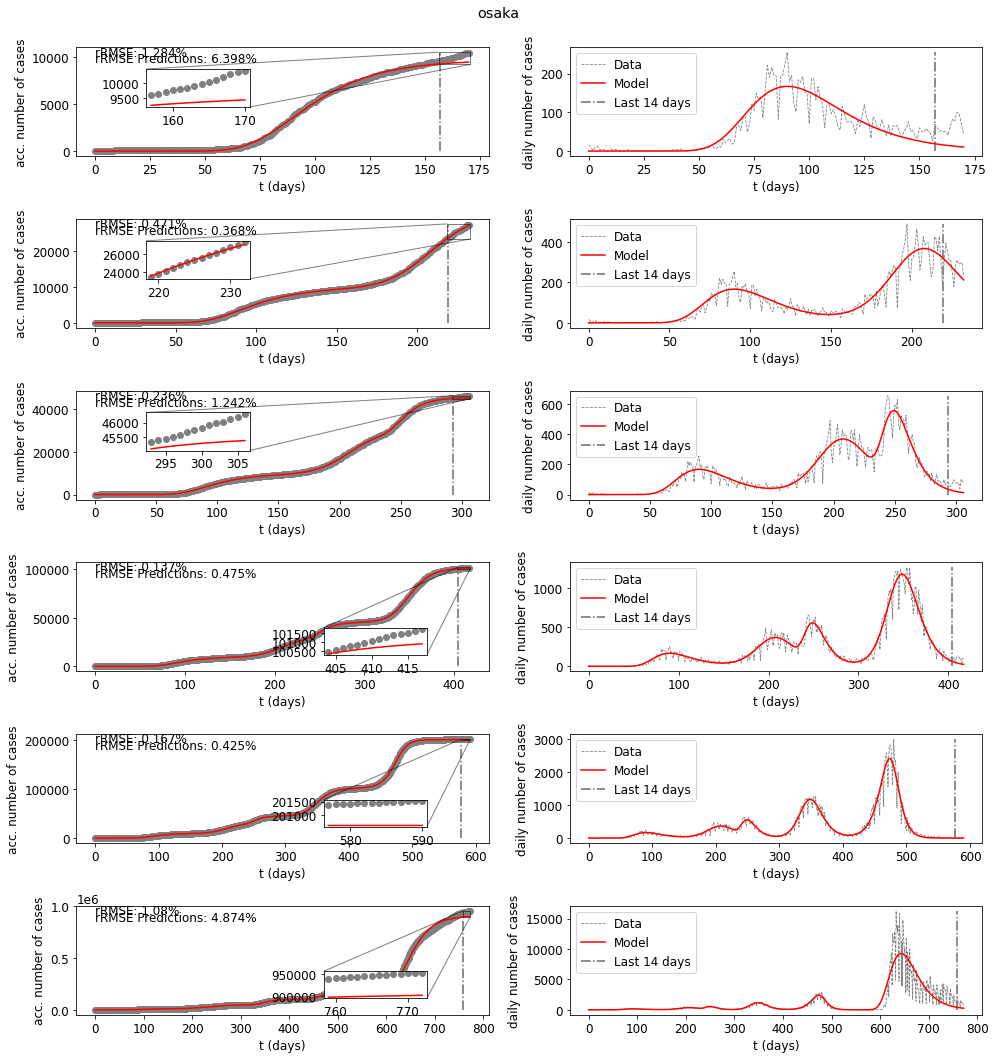

In [6]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]

optimize.update_cond = update_cond_nw

# ====================================================================================

# Transition Points
x_nw = get_transition_points(acc_data, visual=False, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:]

print('x_nw:', x_nw)

sig_params, rel_rmse_list = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = n_weeks_pred,
                               scaling_factor = scaling_factor
                            )

rel_rmse_by_test['Test 2'] = rel_rmse_list

### 3 - A0 = max(acc_data)

In [7]:
x_nw_diff = []
for i in range(1, len(x_nw)):
    x_nw_diff.append(x_nw[i] - x_nw[i-1])

x_nw_diff

[62, 74, 111, 173, 182]

x_nw: [171, 233, 307, 418, 591, 773]
Sigmoid #1 - A0:30.166083510207198 | tp0:97.02605915507647 | delta0:12.904420787275143 | nu0:1.0 
(optimal) Sigmoid #1 - A0:30.166083510207198 | tp0:97.02605915507647 | delta0:12.904420787275143 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:61.49213255774281 | tp0:205.52422244762897 | delta0:12.472895051010564 | nu0:1.0 
(optimal) Sigmoid #2 - A0:61.49213255774281 | tp0:205.52422244762897 | delta0:12.472895051010564 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:45.21001633904578 | tp0:254.36873161950135 | delta0:6.993190756334106 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:45.21001633904578 | tp0:254.36873161950135 | delta0:6.993190756334106 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:182.60054818879507 | tp0:350.46102123536576 | delta0:11.346512008608368 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:182.60054818879507 | tp0:350.46102123536576 | delta0:11.346512008608368 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:332.47449479765805 | tp0:471.7306794707347 | delta0:10.566421949129346 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #5 - A0:332.47449479765805 | tp0:471.7306794707347 | delta0:10.566421949129346 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #6 - A0:2262.050973666256 | tp0:653.5581064356611 | delta0:17.719300446096458 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


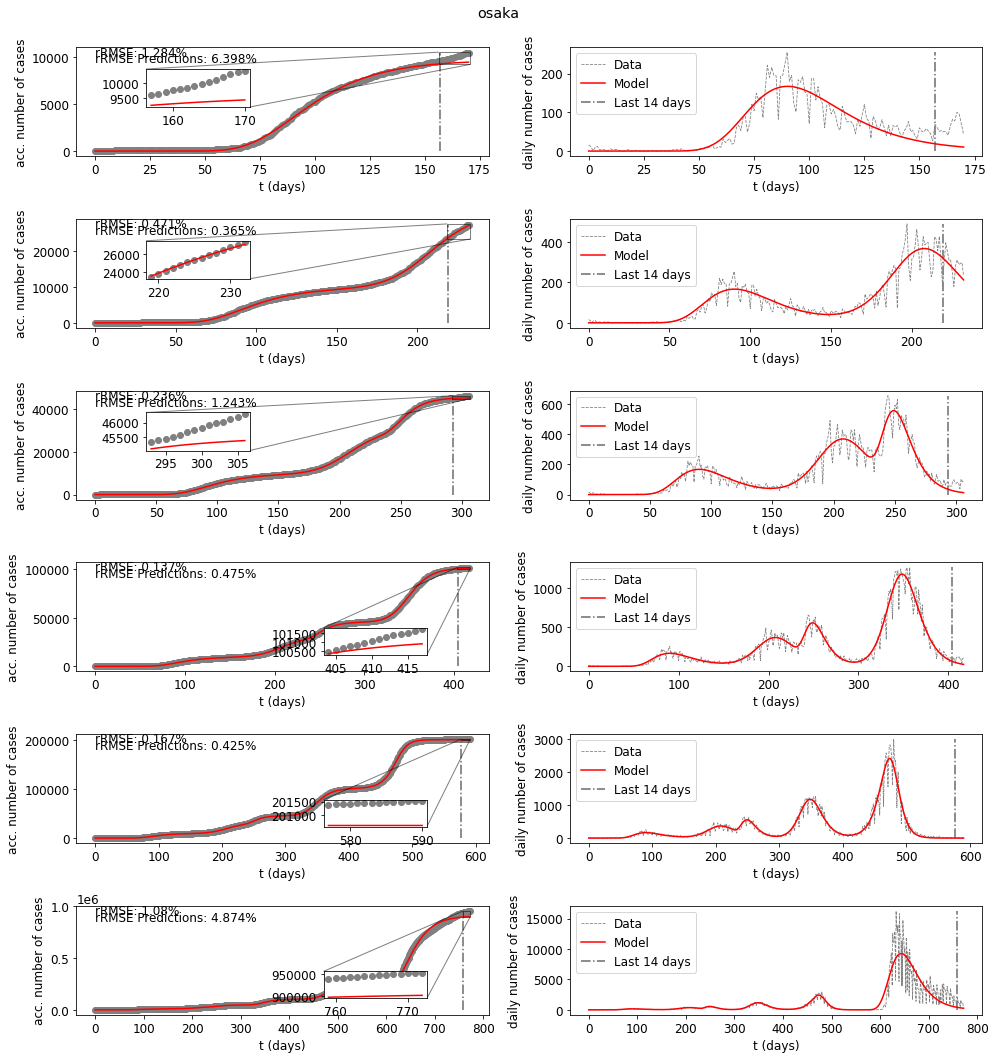

In [8]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]

optimize.update_cond = update_cond_nw

# ====================================================================================

# Transition Points
x_nw = get_transition_points(acc_data, visual=False, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:]

print('x_nw:', x_nw)

sig_params, rel_rmse_list = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = n_weeks_pred,
                               scaling_factor = scaling_factor
                            )

rel_rmse_by_test['Test 3'] = rel_rmse_list

### 4 -

### 5 -

### Resumo dos resultados

- Teste 1 - Padrão | Atualizando $A_0$ e $t_{p_0}$

- Teste 2 - A0 = 2*max(y_t) | Sem atualizar $A_0$ e $t_{p_0}$

- Teste 3 - A0 = max(acc_data) | Sem atualizar $A_0$ e $t_{p_0}$

In [11]:
pd.DataFrame(rel_rmse_by_test)

,Test 1,Test 2,Test 3
0,1.284%,1.284%,1.284%
1,0.471%,0.471%,0.471%
2,0.236%,0.236%,0.236%
3,0.137%,0.137%,0.137%
4,0.167%,0.167%,0.167%
5,1.08%,1.08%,1.08%


Ficou claro durante os testes que o "scaling_factor" impacta bastante a qualidade do ajuste.

Para Osaka, sem previsões ficava bom com  500.

Colocando pra prever 2 semanas, 300 ficou muito melhor do que 500.

### Extra... testando se foi melhor fixar nu=1 para as sigmoides
![image](../images/fixed_nu_test.png)